In [1]:
%matplotlib inline

## pyPIDtoolbox

Import the libs first:

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.fftpack import fft,ifft
from numpy.fft import rfft,irfft
import pandas as pd 
import io
import os

try open csv file using Panda:

In [3]:
df=pd.read_csv('baseline000.bbl.csv') 
df.head()

,loopIteration,time,axisP[0],axisP[1],axisP[2],axisI[0],axisI[1],axisI[2],axisD[0],axisD[1],...,axisSum[0],axisSum[1],axisSum[2],rcCommands[0],rcCommands[1],rcCommands[2],rcCommands[3],axisError[0],axisError[1],axisError[2]
0,0,105047008,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.1,0,0,0
1,2,105047506,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.1,0,0,0
2,4,105048010,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.1,0,0,0
3,6,105048517,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.1,0,0,0
4,8,105049009,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.1,0,0,0


In [4]:
df.columns

Index(['loopIteration', 'time', 'axisP[0]', 'axisP[1]', 'axisP[2]', 'axisI[0]',
       'axisI[1]', 'axisI[2]', 'axisD[0]', 'axisD[1]', 'axisF[0]', 'axisF[1]',
       'axisF[2]', 'rcCommand[0]', 'rcCommand[1]', 'rcCommand[2]',
       'rcCommand[3]', 'setpoint[0]', 'setpoint[1]', 'setpoint[2]',
       'setpoint[3]', 'vbatLatest', 'amperageLatest', 'rssi', 'gyroADC[0]',
       'gyroADC[1]', 'gyroADC[2]', 'accSmooth[0]', 'accSmooth[1]',
       'accSmooth[2]', 'debug[0]', 'debug[1]', 'debug[2]', 'debug[3]',
       'motor[0]', 'motor[1]', 'motor[2]', 'motor[3]', 'flightModeFlags',
       'stateFlags', 'failsafePhase', 'rxSignalReceived',
       'rxFlightChannelsValid', 'heading[0]', 'heading[1]', 'heading[2]',
       'axisSum[0]', 'axisSum[1]', 'axisSum[2]', 'rcCommands[0]',
       'rcCommands[1]', 'rcCommands[2]', 'rcCommands[3]', 'axisError[0]',
       'axisError[1]', 'axisError[2]'],
      dtype='object')

In [5]:

#data=df[['rcCommand[3]','gyroADC[0]', 'gyroADC[1]', 'gyroADC[2]']].values.T
#data=df[['rcCommand[1]','vbatLatest', 'amperageLatest', 'gyroADC[0]']].values.T
#data=df[[ 'setpoint[0]','setpoint[1]','setpoint[2]', 'rcCommand[3]','debug[0]','debug[1]','debug[2]']].values.T
setpointData = df[[ 'setpoint[0]','setpoint[1]','setpoint[2]']].values.T
gyroADCData = df[[ 'gyroADC[0]', 'gyroADC[1]', 'gyroADC[2]']].values.T
gyroScaleData = df[[ 'debug[0]','debug[1]','debug[2]']].values.T
thrData = df[['rcCommand[3]']].values.T[0]
print(setpointData)
print(gyroADCData)
print(gyroScaleData)
print(thrData)

[[  0   0   0 ... -53 -52 -50]
 [  0   0   0 ...   1   1   1]
 [  0   0   0 ...  20  20  20]]
[[  0   0   0 ... -31 -31 -33]
 [  0   0   0 ... -13 -13 -13]
 [  0   0   0 ...  16  16  16]]
[[  0   0   0 ... -32 -32 -41]
 [  0   0   0 ...  -7  -3  -1]
 [  0   0   0 ...  13  15  15]]
[1000 1000 1000 ... 1215 1216 1217]


105


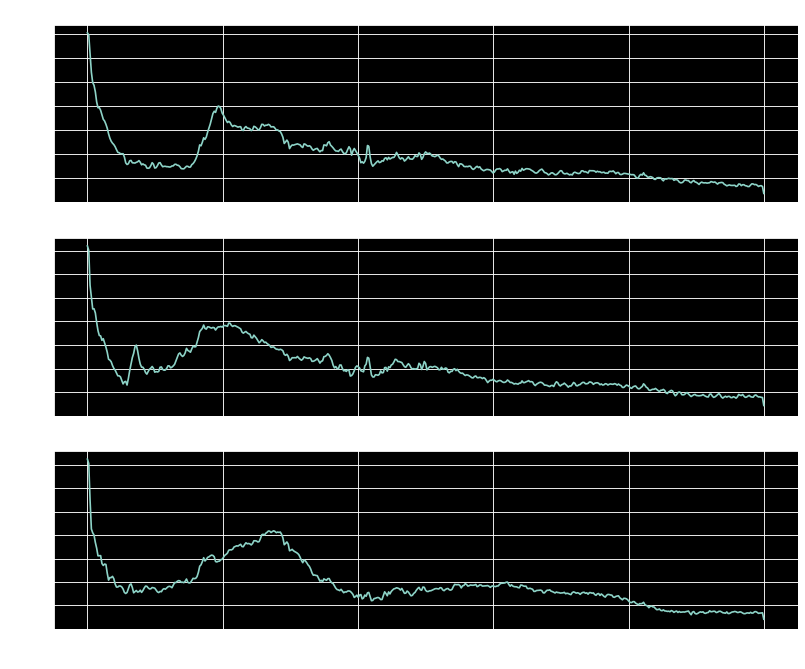

In [6]:
i = 105
print(i)
#fft_data=fft(data[1][512*i:], 512)
#print(data[3][512*i:512*i+512])
#plt.plot(fft_data[2:1000])
#realPart=
#plt.subplot(1,2,1)

#plt.psd(data[1][512*i:512*i+512],512,2000)
plt.figure(figsize=(12, 10), dpi= 80)
plt.subplot(3,1,1)
plt.title('roll')
plt.psd(gyroScaleData[0],1024,2000)
plt.subplot(3,1,2)
plt.title('pitch')
plt.psd(gyroScaleData[1],1024,2000)
plt.subplot(3,1,3)
plt.title('yaw')
plt.psd(gyroScaleData[2],1024,2000)
#plt.plot(np.array(range(1,256))*2000/512, np.abs(fft_data)[1:256]/512)
#plt.subplot(1,2,2)
#plt.plot(data[1][512*i:512*i+512])
i=i+1

In [7]:
signal = gyroScaleData[1]
thr = thrData #1000~2000
bufferSize = 512
batch = int(len(signal)/bufferSize)
thrfft = np.zeros((100, int(bufferSize/2)), dtype=np.float64)
#timefft = np.zeros((len(signal)-bufferSize, int(bufferSize/2)), dtype=np.float64)
thrCount = np.zeros(100, dtype=np.int32)

#print(thr)
#print(batch)

for i in range(0, len(signal)-bufferSize, 10):
    idx = i
    #print(np.sum(thr[idx:idx+bufferSize])/bufferSize)
    avgThr = int(np.sum(thr[idx:idx+bufferSize])/bufferSize/10) - 100
    if avgThr < 0:
        avgThr = 0
    if avgThr > 99:
        avgThr = 99
    #print(avgThr)
    fft_data = fft(np.hanning(bufferSize) * signal[idx:idx+bufferSize], bufferSize)
    realPart = np.abs(np.real(fft_data[:int(bufferSize/2)]))/bufferSize*2
    #timefft[i]+=realPart
    thrfft[avgThr]= thrfft[avgThr]+realPart
    thrCount[avgThr] += 1
    
for i in range(100):
    if thrCount[i] != 0:
        thrfft[i]=thrfft[i]/thrCount[i]
#print(thrfft)
#plt.imshow(bitmap)
#plt.hist(bitmap, bins=256, range=(0.0, 256.0))
    

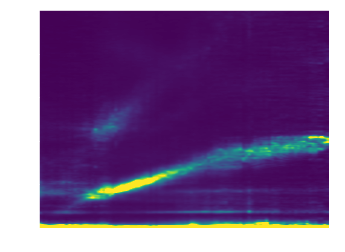

In [8]:
#plt.figure(figsize=(2, 14), dpi= 80)
plt.imshow(thrfft.T, vmax=1, aspect=0.075, interpolation='gaussian', origin='lower', extent=[0, 100, 0, 2000/2])

In [9]:
def smooth(x, wnd):
    # x: NumPy 1-D array containing the data to be smoothed
    # wnd: smoothing window size needs, which must be odd number,
    # as in the original MATLAB implementation
    out0 = np.convolve(x,np.ones(wnd,dtype=int),'valid')/wnd
    r = np.arange(1,wnd-1,2)
    start = np.cumsum(x[:wnd-1])[::2]/r
    stop = (np.cumsum(x[:-wnd:-1])[::2]/r)[::-1]
    return np.concatenate((  start , out0, stop  ))

278950
974


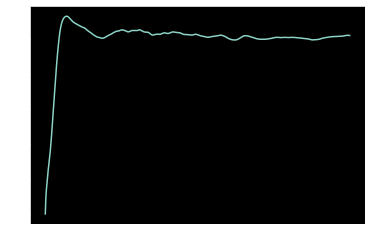

In [10]:
segment_length= 2048
wnd=1024;               # 500ms step response function, the length will be depended on lograte  
StepRespDuration_ms=500 # max dur of step resp in ms for plotting
rateHighThreshold=500   # degs/s
skipRate = 0.10

gyro_signal = gyroADCData[1]
setpoint_signal = setpointData[1]
step_response = np.zeros((5000, segment_length), dtype=np.float64)
input_segments = np.zeros((5000, segment_length), dtype=np.float64)

print(len(gyro_signal))

seg_vector = range(0, len(gyro_signal)-segment_length, round(segment_length*skipRate))
j = 0
for i in seg_vector:
    Xseg = setpoint_signal[i:i+segment_length]
    if np.max(np.abs(Xseg)) < 20:
        continue
    Yseg = gyro_signal[i:i+segment_length]
    x_fft = rfft(np.hamming(segment_length) * Xseg)
    y_fft = rfft(np.hamming(segment_length) * Yseg)
    H=x_fft/len(x_fft)
    G=y_fft/len(y_fft)
    Hcon=np.conj(H)
    imp = np.real(irfft((G * Hcon) / (H * Hcon + .0001)))# impulse response function, .0001 to avoid divide by 0
    resp = np.cumsum(smooth(imp, 21))
    resp = resp - resp[0]
    if np.var(resp)>0.2: #use np.var to control the quality, see the kmean section below
        continue;
    #plt.plot(resp)
    #break
    step_response[j,:] = resp
    input_segments[j] = Xseg
    #print(step_response[0])
    #break
    j=j+1

    if j>=5000:
        break
#plt.plot(np.max(step_response[:j], axis=0)) 
plt.plot((np.sum(step_response[:j], axis=0)/j)[:wnd])
#plt.plot(np.min(step_response[:j], axis=0))
print(j)

The result of step response sometimes looks weird. In Brian's PIDtoolbox, there's a quality control process, which drops the BAD segments.

What do those BAD segments look like? How much would they affect the final result?

Use kmeans to check it:

In [15]:
from scipy.cluster.vq import vq,kmeans,whiten

GROUP_COUNT = 4
features = step_response[0:j,:]
# Whiten data
whitened = whiten(features)
# Find N clusters in the data
codebook, distortion = kmeans(whitened, GROUP_COUNT)
print(distortion)

result = vq(whitened, codebook)
#print(result)

28.159003231384535


[117. 379. 118. 360.]


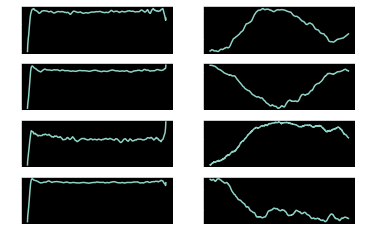

In [17]:
resp_cluster = np.zeros((GROUP_COUNT, segment_length))
setpoint_cluster = np.zeros((GROUP_COUNT, segment_length))
member_count = np.zeros(GROUP_COUNT)
for i in range(j):
    codebook_idx = result[0][i]
    resp_cluster[codebook_idx] = resp_cluster[codebook_idx] + step_response[i];
    setpoint_cluster[codebook_idx] = setpoint_cluster[codebook_idx] + input_segments[i]
    member_count[result[0][i]] = member_count[result[0][i]] + 1
for i in range(GROUP_COUNT):
    plt.subplot(GROUP_COUNT,2,i*2+1)
    plt.plot(resp_cluster[i]/member_count[i])
    plt.subplot(GROUP_COUNT,2,i*2+2)
    plt.plot(setpoint_cluster[i]/member_count[i])
print(member_count)

[ 1  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0
  0  1  0  1  1  2  2  1  1  0  2  1  2  6  0  5  3  3  3  5  5  6  7  3
  6  6  5  5 10  4  1  7 11  7  7  6  4  8  5  6  5  6  8  6  5  1  7  7
  4  5  5  7  6  3  1  3  4  7  7  2  5  1  1  5  2  0  2  1  8  4  5  1
  3  2  4  6]
[0.00368568 0.00387419 0.00406269 0.0042512  0.0044397  0.00462821
 0.00481671 0.00500522 0.00519372 0.00538223 0.00557073 0.00575924
 0.00594774 0.00613625 0.00632475 0.00651326 0.00670176 0.00689027
 0.00707877 0.00726728 0.00745578 0.00764429 0.00783279 0.0080213
 0.0082098  0.00839831 0.00858682 0.00877532 0.00896383 0.00915233
 0.00934084 0.00952934 0.00971785 0.00990635 0.01009486 0.01028336
 0.01047187 0.01066037 0.01084888 0.01103738 0.01122589 0.01141439
 0.0116029  0.0117914  0.01197991 0.01216841 0.01235692 0.01254542
 0.01273393 0.01292243 0.01311094 0.01329944 0.01348795 0.01367645
 0.01386496 0.01405346 0.01424197 0.01443047 0.01461898 0.01480748
 0.01499599 0.01518449 0.

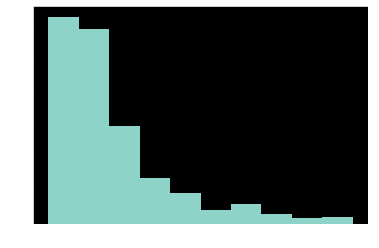

In [13]:
#print(np.var(np.array([[0,0,0,0,0],[1,1,1,1,1],[2,2,2,2,2]]), axis=1))
plt.hist(np.var(step_response[:j], axis=1), bins=10) 
counts, bins = np.histogram(np.var(step_response[:j], axis=1), bins=1024)
print(counts[:100])
print(bins[:100])